In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
item = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
sellers = pd.read_csv("../data/raw/olist_sellers_dataset.csv")
order = pd.read_csv("../data/raw/olist_orders_dataset.csv")
product = pd.read_csv("../data/raw/olist_products_dataset.csv")
payment = pd.read_csv("../data/raw/olist_order_payments_dataset.csv")
review = pd.read_csv("../data/raw/olist_order_reviews_dataset.csv")
customer = pd.read_csv("../data/raw/olist_customers_dataset.csv")
category = pd.read_csv("../data/raw/product_category_name_translation.csv")
geo = pd.read_csv("../data/raw/olist_geolocation_dataset.csv")

In [3]:
# -------------------- Merge --------------------
dataframe = customer.merge(order, on='customer_id')
dataframe = dataframe.merge(review, on='order_id')
dataframe = dataframe.merge(payment, on='order_id', validate='m:m')
dataframe = dataframe.merge(item, on='order_id')
dataframe = dataframe.merge(product, on='product_id')
dataframe= dataframe.merge(category, on='product_category_name', how='left')

In [4]:
df = dataframe.copy()

In [5]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,credit_card,8,335.48,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,credit_card,1,173.30,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,credit_card,8,252.25,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [6]:
df.shape

(117329, 37)

In [41]:
df.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price           

In [7]:
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


In [8]:
comentarios_df = df[['review_score', 'review_comment_title', 'review_comment_message']].dropna()
df = df.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [9]:
# Categórica: preencher com 'unknown'
df['product_category_name'] = df['product_category_name'].fillna('unknown')
df['product_category_name_english']= df['product_category_name_english'].fillna('unknown')

# Colunas numéricas: preencher com a mediana
cols_numericas = ['product_name_lenght', 'product_description_lenght',
                  'product_photos_qty', 'product_weight_g',
                  'product_length_cm', 'product_height_cm', 'product_width_cm']

df['product_category_name'] = df['product_category_name'].fillna('unknown')

for col in cols_numericas:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)

In [10]:
df = df.dropna(subset=['order_approved_at'])

In [11]:
df[df['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()


order_status
canceled       483
invoiced       370
processing     370
unavailable      7
approved         3
delivered        2
Name: count, dtype: int64

In [12]:
df[df['order_delivered_customer_date'].isnull()]['order_status'].value_counts()


order_status
shipped        1167
canceled        546
invoiced        370
processing      370
delivered         8
unavailable       7
approved          3
Name: count, dtype: int64

In [13]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1235
order_delivered_customer_date    2471
order_estimated_delivery_date       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_cate

In [14]:
df.shape

(117314, 35)

In [15]:
df.describe()

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.00000,117314.000000
mean,35060.001483,4.031428,1.094464,2.940399,172.066821,1.194137,120.525520,20.027653,48.814097,783.121699,2.188230,2110.447142,30.253073,16.61199,23.070708
std,29849.576887,1.387977,0.731220,2.775461,265.402511,0.684261,182.953087,15.828884,9.968631,648.060422,1.711451,3784.671260,16.176495,13.45188,11.745138
min,1003.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000
25%,11250.000000,4.000000,1.000000,1.000000,60.750000,1.000000,39.900000,13.080000,43.000000,348.000000,1.000000,300.000000,18.000000,8.00000,15.000000
50%,24240.000000,5.000000,1.000000,2.000000,108.100000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.00000,20.000000
75%,58770.000000,5.000000,1.000000,4.000000,189.060000,1.000000,134.900000,21.180000,57.000000,976.000000,3.000000,1800.000000,38.000000,20.00000,30.000000
max,99990.000000,5.000000,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000


In [40]:
df.duplicated().sum()

0

15


<function matplotlib.pyplot.show(close=None, block=None)>

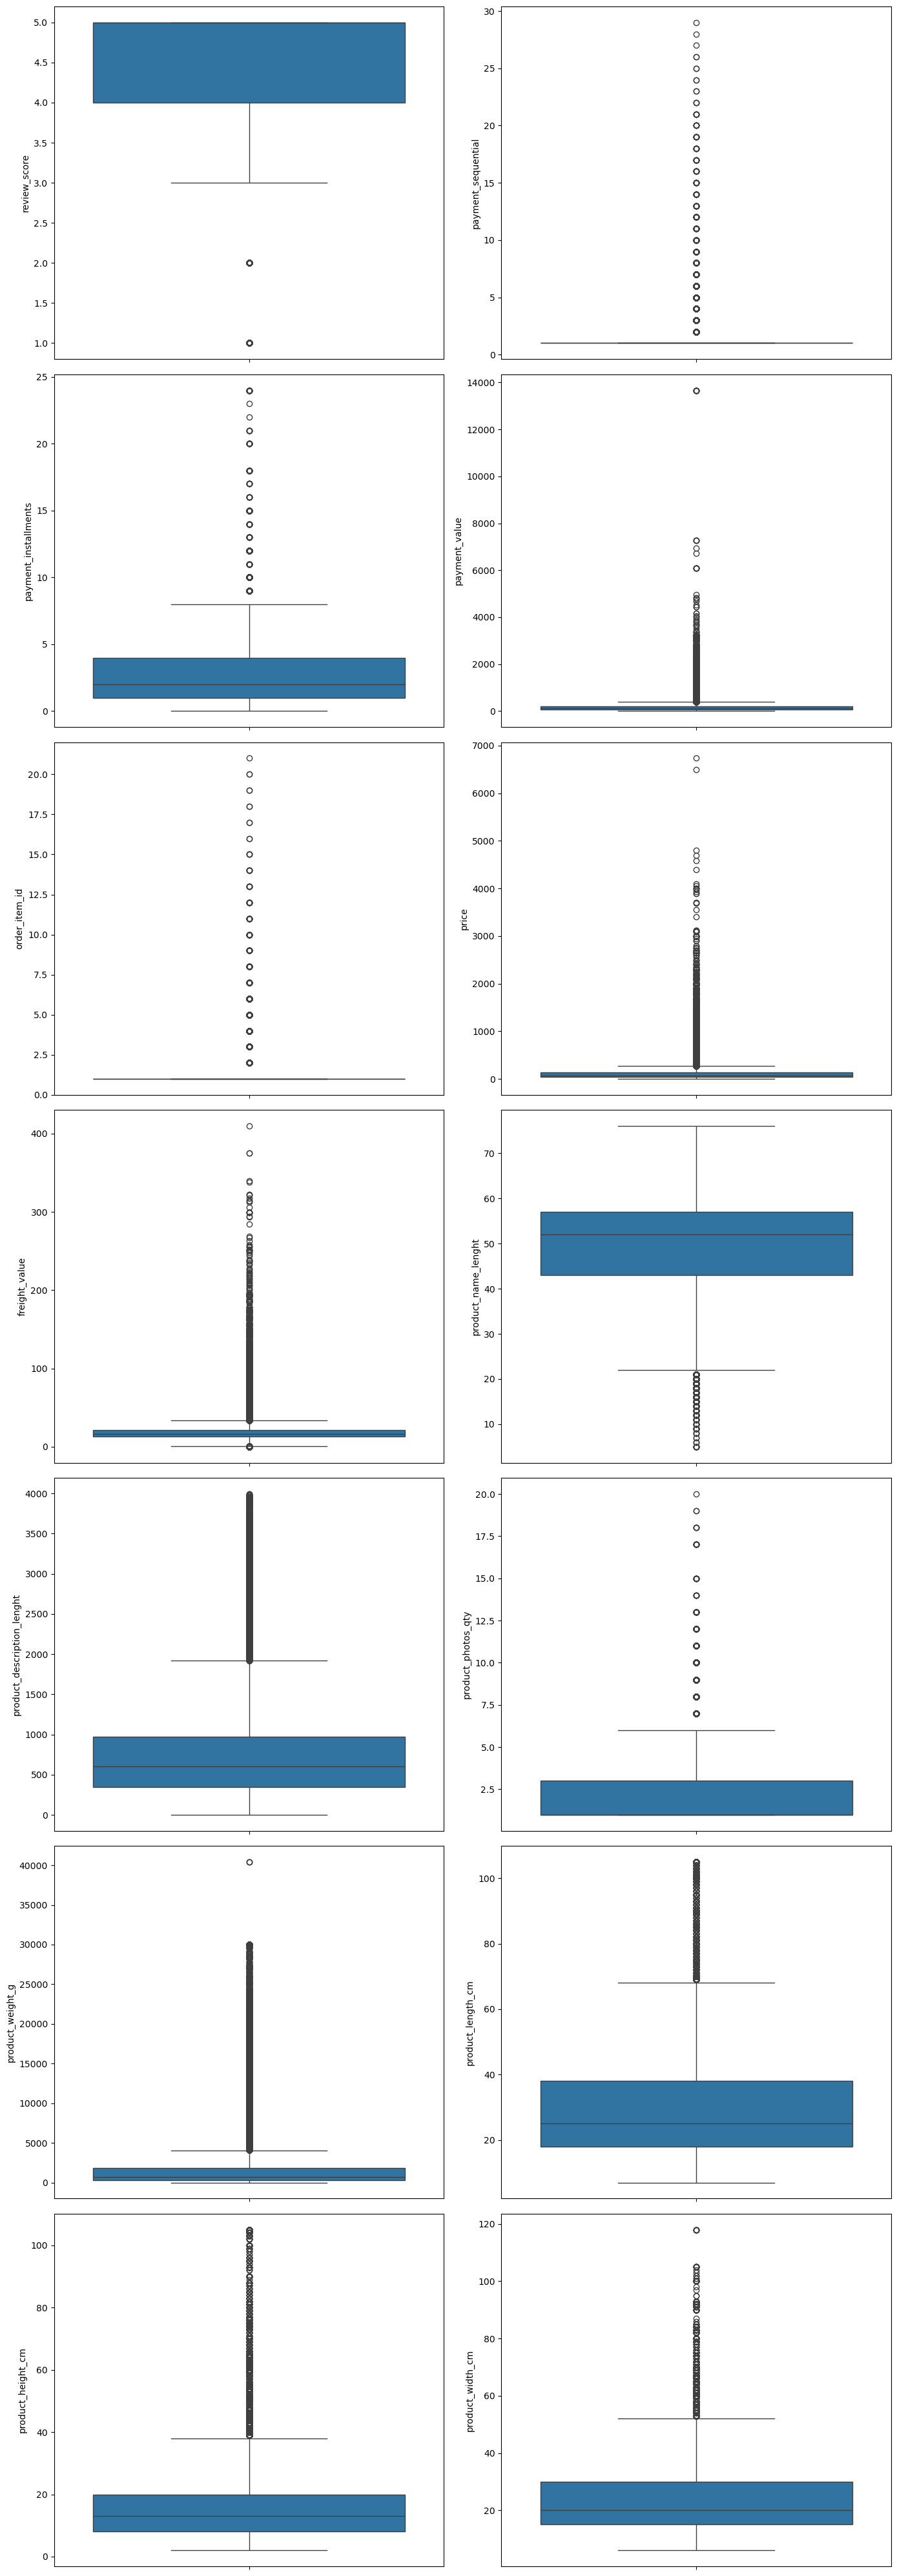

In [16]:
numeric_var = []
for i in df.columns[0:37].tolist():
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        numeric_var.append(i)
print(len(numeric_var))

del numeric_var[0]

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 2, figsize=(14, 40)) #8 linhas e 2 colunas
linha = 0
coluna = 0
for i in numeric_var:
    sns.boxplot(data=df, y=i, ax=axes[linha][coluna])
    coluna+=1
    if coluna == 2:
        linha +=1
        coluna = 0
plt.show

In [35]:
df['price'].describe()

count    99395.000000
mean        99.788082
std        137.394803
min          0.850000
25%         35.900000
50%         63.800000
75%        115.000000
max       3099.900000
Name: price, dtype: float64

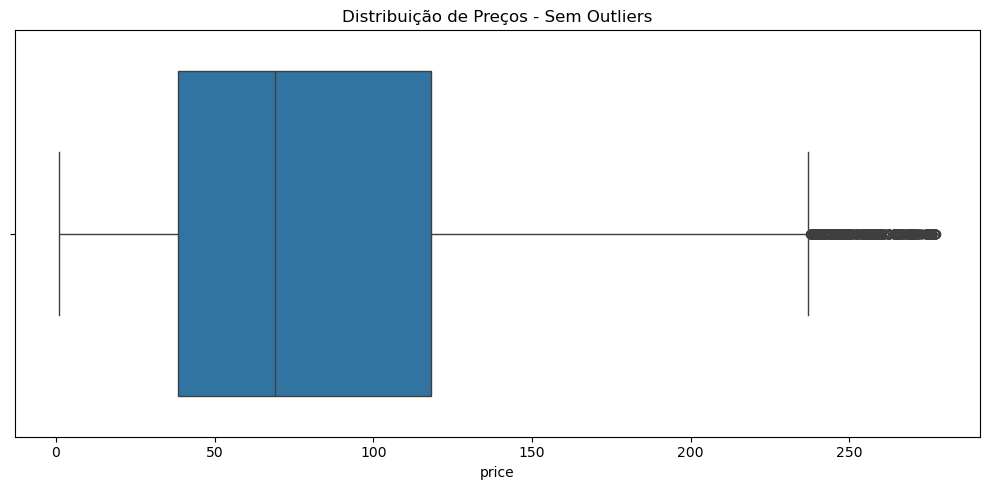

In [19]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_sem_outliers['price'])
plt.title('Distribuição de Preços - Sem Outliers')
plt.show()


In [36]:
df['product_weight_g'].describe()

count    99395.000000
mean       817.564596
std        755.536342
min          0.000000
25%        250.000000
50%        527.000000
75%       1200.000000
max       3500.000000
Name: product_weight_g, dtype: float64

In [20]:
# Ver o maior
df[df['product_weight_g'] == df['product_weight_g'].max()]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
15505,958279c23050d6207d196c3057648f6f,de00290d2a997f24e1706fdc2d366a0e,11730,mongagua,SP,6ecf1a4051b4c5ed613624b460970a26,delivered,2017-11-17 08:40:57,2017-11-17 08:55:48,2017-11-17 20:36:56,2017-12-01 12:08:23,2017-12-06 00:00:00,13fe815dc5c4076ab42f34545df82ca1,5,2017-12-02 00:00:00,2017-12-04 16:04:31,1,credit_card,2,92.06,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-11-23 08:55:48,80.0,12.06,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table
44768,ccd6a4af78390b7ae560c1cc1cb1a2ff,32d0420a22921ea161d8bff0e0297b71,88820,icara,SC,4a45f9f66971302cf881ecfa142f42ba,delivered,2017-12-23 19:03:24,2017-12-23 19:13:20,2017-12-28 15:13:58,2018-01-25 22:17:15,2018-01-29 00:00:00,62a35e9e362cf9b27b9ee8e047afbedf,1,2018-01-26 00:00:00,2018-01-27 00:42:30,1,credit_card,1,96.32,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-12-29 19:13:20,80.0,16.32,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table
56279,51934b734e94e61d8efa4523e175c6c3,4fbb5c68b6851f6e35c543f963b43e4c,86455,joaquim tavora,PR,9223919b300f6989e1715333fca0d6ce,delivered,2018-03-01 23:05:31,2018-03-01 23:15:32,2018-03-02 22:33:58,2018-03-27 20:47:27,2018-03-26 00:00:00,1474903cd02494e327de0317af95d846,5,2018-03-28 00:00:00,2018-03-30 12:39:00,1,credit_card,1,96.32,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2018-03-07 23:15:32,80.0,16.32,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table


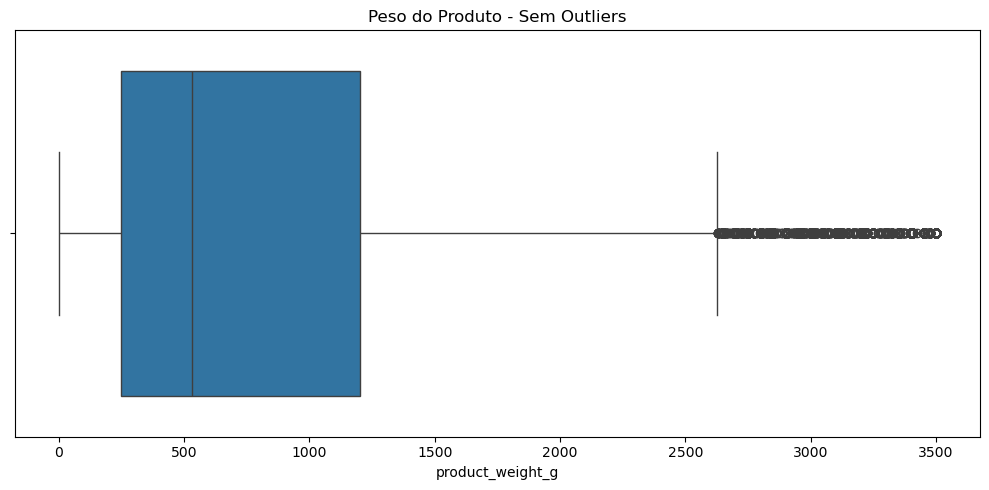

In [21]:
# Definir o limite superior como 3500 para manter os valores reais até esse ponto
limite_superior_ajustado = 3500

# Filtrando os dados para remover apenas os outliers acima de 3100
df = df[df['product_weight_g'] <= limite_superior_ajustado]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['product_weight_g'])
plt.title('Peso do Produto - Sem Outliers')
plt.show()

In [23]:
df['payment_value'].describe()

count    99487.000000
mean       146.320998
std        231.990123
min          0.000000
25%         55.360000
50%         96.660000
75%        164.660000
max      13664.080000
Name: payment_value, dtype: float64

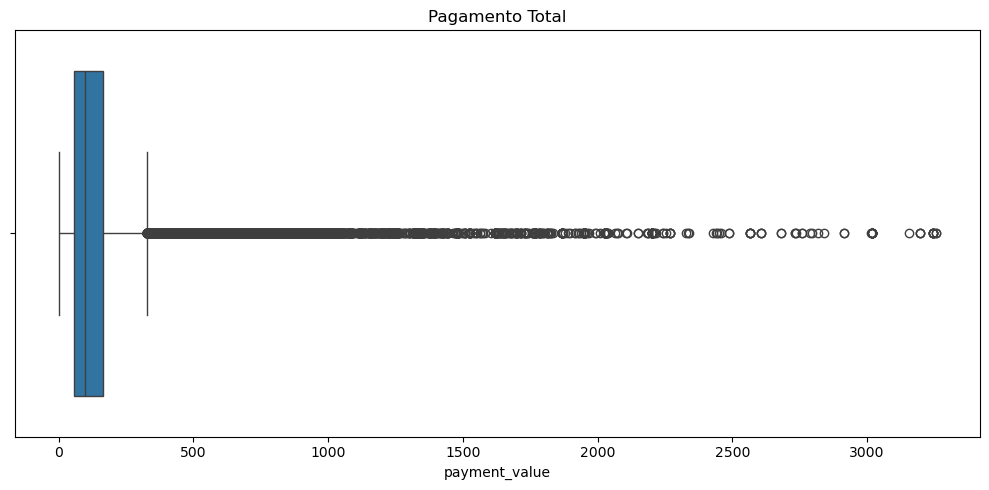

In [24]:
limite_superior_ajustado = 3300

# Filtrando os dados para remover apenas os outliers acima de 3300
df = df[df['payment_value'] <= limite_superior_ajustado]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['payment_value'])
plt.title('Pagamento Total')
plt.show()

In [27]:
df['freight_value'].describe()

count    99456.000000
mean        16.965889
std          8.624708
min          0.000000
25%         12.650000
50%         15.510000
75%         18.870000
max        209.630000
Name: freight_value, dtype: float64

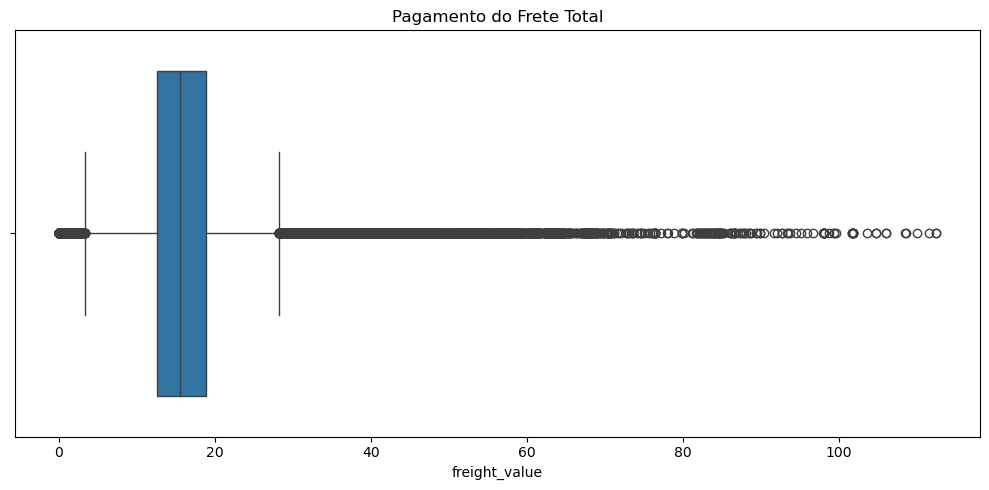

In [32]:
limite_superior_ajustado = 120

# Filtrando os dados para remover apenas os outliers acima de 3100
df = df[df['freight_value'] <= limite_superior_ajustado]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['freight_value'])
plt.title('Pagamento do Frete Total')
plt.show()

In [29]:
df['product_width_cm'].describe()

count    99453.000000
mean        20.801786
std          9.389184
min          6.000000
25%         14.000000
50%         18.000000
75%         25.000000
max        118.000000
Name: product_width_cm, dtype: float64

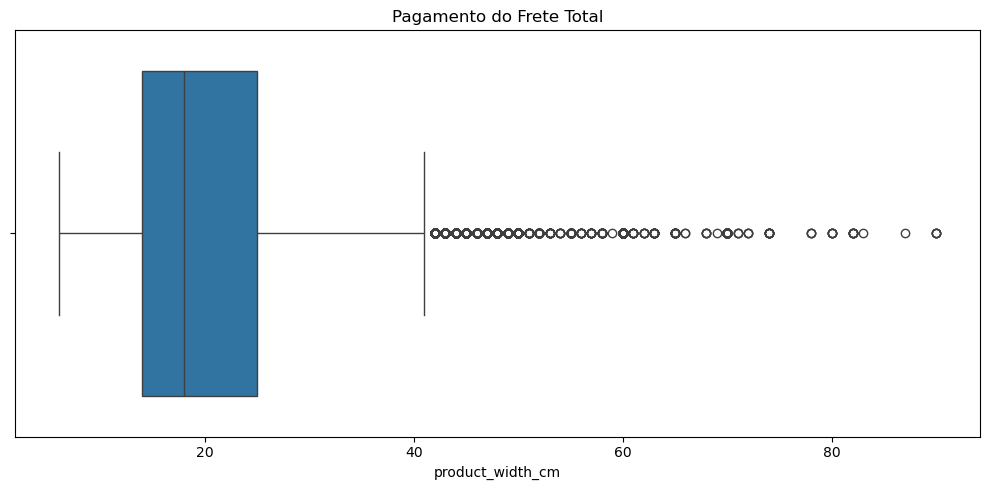

In [31]:
limite_superior_ajustado = 90

# Filtrando os dados para remover apenas os outliers acima de 3100
df = df[df['product_width_cm'] <= limite_superior_ajustado]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['product_width_cm'])
plt.title('Pagamento do Frete Total')
plt.show()

15


<function matplotlib.pyplot.show(close=None, block=None)>

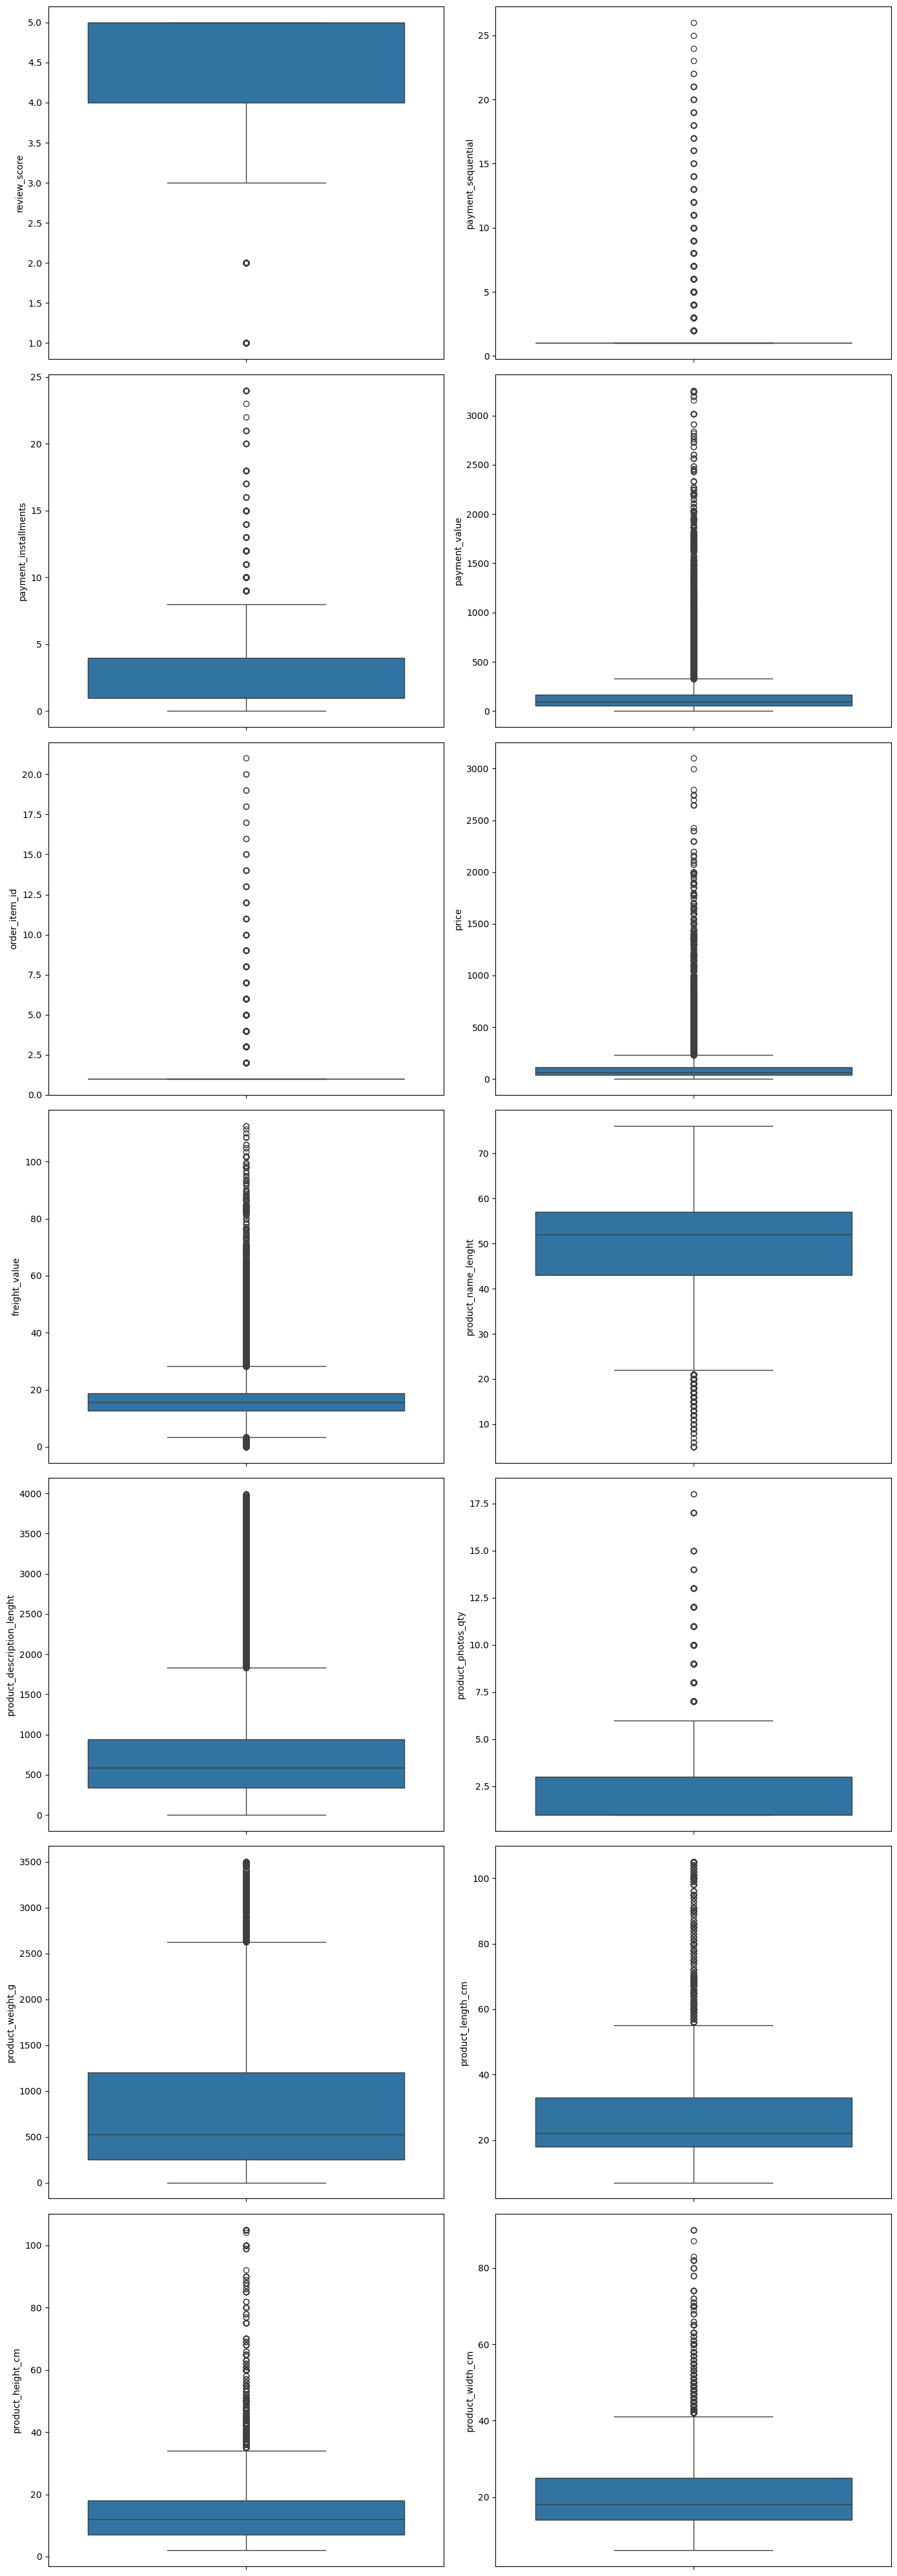

In [33]:
numeric_var = []
for i in df.columns[0:37].tolist():
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        numeric_var.append(i)
print(len(numeric_var))

del numeric_var[0]

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 2, figsize=(14, 40)) #8 linhas e 2 colunas
linha = 0
coluna = 0
for i in numeric_var:
    sns.boxplot(data=df, y=i, ax=axes[linha][coluna])
    coluna+=1
    if coluna == 2:
        linha +=1
        coluna = 0
plt.show

In [42]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05 00:00:00,bc88d3b86fa8443d42894eb7b5f0d73c,5,2018-02-21 00:00:00,2018-02-26 13:53:18,1,credit_card,1,22.77,1,b5466db4cecf95c3c1be0ba32538ce1a,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,informatica_acessorios,37.0,322.0,3.0,100.0,16.0,3.0,13.0,computers_accessories
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00,2381e1fb0932d9459573a0553dd8a2b5,3,2017-11-28 00:00:00,2017-11-28 17:14:46,1,credit_card,3,36.01,1,124f74f703e88efe001a10bfa718b6ff,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,unknown,52.0,600.0,1.0,250.0,15.0,8.0,20.0,unknown
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20 00:00:00,8566d94f7bf3bedbb4ca6a29725fc382,5,2018-01-27 00:00:00,2018-01-30 19:18:27,1,debit_card,1,39.10,1,08401f48b67a852d06105725c3013eff,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,brinquedos,58.0,739.0,5.0,350.0,28.0,10.0,12.0,toys
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,2018-01-13 14:51:55,2018-02-05 00:00:00,07f4bedc3ab711f4b3400ceaecdd9f9b,5,2018-01-14 00:00:00,2018-01-16 19:29:39,1,credit_card,1,122.47,1,78efe838c04bbc568be034082200ac20,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,moveis_decoracao,57.0,272.0,1.0,2500.0,40.0,10.0,30.0,furniture_decor
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20 00:00:00,28bbb42c128a4a89860906d48722cede,5,2017-12-09 00:00:00,2017-12-10 18:58:15,1,credit_card,1,40.40,1,6b874ff4c71d18e91079b40396bf176a,b6e1504972665f739dec4facb9943775,2017-12-01 18:01:20,25.30,15.10,automotivo,41.0,1117.0,8.0,300.0,31.0,17.0,27.0,auto


In [43]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

In [44]:
df['delivery_time'] = df['order_delivered_customer_date'] - df['order_approved_at']
df['late_delivery'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']

In [49]:
cols_to_category = [
    'customer_state',
    'order_status',
    'payment_type',
    'product_category_name',
    'product_category_name_english'
]

df[cols_to_category] = df[cols_to_category].astype('category')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99395 entries, 6 to 117328
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_id                    99395 non-null  object         
 1   customer_unique_id             99395 non-null  object         
 2   customer_zip_code_prefix       99395 non-null  int64          
 3   customer_city                  99395 non-null  object         
 4   customer_state                 99395 non-null  category       
 5   order_id                       99395 non-null  object         
 6   order_status                   99395 non-null  category       
 7   order_purchase_timestamp       99395 non-null  datetime64[ns] 
 8   order_approved_at              99395 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   98359 non-null  datetime64[ns] 
 10  order_delivered_customer_date  97360 non-null  datetime64[ns] 
 11  order_

In [52]:
df.to_csv("../data/processed/dataset_clear.csv", index=False)

In [5]:
geo = pd.read_csv("../data/raw/olist_geolocation_dataset.csv", dtype={'geolocation_zip_code_prefix': str})

In [6]:
# Gets the first three and four first digits of zip codes, we will explore this further to understand how zip codes works
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix'].str[0:1]
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix'].str[0:2]
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix'].str[0:3]
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix'].str[0:4]
geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits
0,01037,-23.545621,-46.639292,sao paulo,SP,0,01,010,0103
1,01046,-23.546081,-46.644820,sao paulo,SP,0,01,010,0104
2,01046,-23.546129,-46.642951,sao paulo,SP,0,01,010,0104


In [7]:
geo['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,count
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


In [9]:
# Removing some outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = geo[geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[geo.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = geo[geo.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.geolocation_lng <=  -34.79314722]

In [10]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

In [11]:
# transforming the prefixes to int for plotting purposes
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix_1_digits'].astype(int)
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix_2_digits'].astype(int)
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix_4_digits'].astype(int)

In [12]:
geo.to_csv("../data/processed/geolocation.csv", index=False)